In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from matplotlib.pyplot import figure

In [2]:
centers = [[11,7.5],[17,12.5]]
X, _ = make_blobs(n_samples = 300, centers = centers, cluster_std = 2)

In [3]:
##Getting co-ordinates of one car
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
carx = firebase.get('/car/231427/location/lat', None)
cary = firebase.get('/car/231427/location/lon', None)
carid = firebase.get('/car', None)
cid = list(carid)
print(cid[0])
print(carx)
print(cary)
X = np.append(X,[np.array([carx,cary])],axis=0)

225364
18
7.5


In [4]:
## Getting the co-ordinates of ERV
from firebase import firebase
firebase = firebase.FirebaseApplication('https://ambu-b65bb.firebaseio.com/', None)
erv_dest_x = firebase.get('/Ambulance/154068/destination/lat', None)
erv_dest_y = firebase.get('/Ambulance/154068/destination/lon', None)
print(erv_dest_x)
print(erv_dest_y)

14
12.5


[18.   7.5]


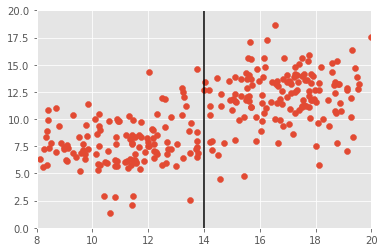

In [7]:
plt.scatter(X[:,0],X[:,1])
print(X[300])
plt.plot([14,14],[0,20],color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [8]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [9]:
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[16.96942796 12.59514601]
 [10.98021561  7.55461985]]
Number of estimated clusters: 2


In [10]:
colors = 10*['g.','b.','c.','k.','y.','m.']

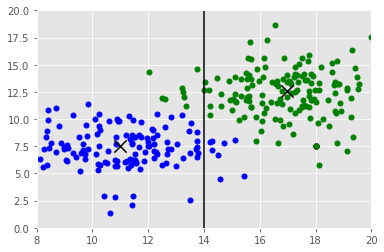

In [11]:
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)

plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)
plt.plot([14,14],[0,20],color="black")
plt.scatter(carx,cary,color="black")
plt.ylim(0,20)
plt.xlim(8,20)
plt.show()

In [12]:
# count1=0 count2=0 count3=0
count = []
for i in range(n_clusters_):
    count.append(0)
print(count[0]) 

0


In [13]:
# counting the no.of cars in each cluster
for i in range(n_clusters_):
    for j in range(len(X)):
        if(labels[j]==i):
            count[i]=count[i]+1
            
for i in range(n_clusters_):
    print(count[i])

156
145


In [14]:
highlabel=0;
temp=count[0]
for i in range(n_clusters_):
    if count[i]>temp:
        temp = count[i]
        highlabel=i
print(highlabel)

0


In [15]:
## moving all min(n-1) co-ordinates to max clustered lane

for i in range(len(X)):
    if(labels[i]!=highlabel):
        print("Co-ordinates are :",X[i])

Co-ordinates are : [15.43886702  4.79636584]
Co-ordinates are : [11.55090234  5.9812307 ]
Co-ordinates are : [8.40055329 9.91875592]
Co-ordinates are : [10.25964134  5.7942858 ]
Co-ordinates are : [10.24210868  7.49239233]
Co-ordinates are : [8.79713979 9.39784953]
Co-ordinates are : [11.94272757  8.29797618]
Co-ordinates are : [13.77513278  6.91553209]
Co-ordinates are : [14.27330514  7.18102365]
Co-ordinates are : [10.9103136   9.82144007]
Co-ordinates are : [ 9.31010229 10.35282866]
Co-ordinates are : [12.60688948  9.31062041]
Co-ordinates are : [10.45917046  6.0310856 ]
Co-ordinates are : [10.1473211   6.81241427]
Co-ordinates are : [13.47827728  8.93036902]
Co-ordinates are : [5.92925749 8.15814975]
Co-ordinates are : [14.56400563  4.44459909]
Co-ordinates are : [9.75852547 9.47449007]
Co-ordinates are : [8.26813249 7.26712611]
Co-ordinates are : [12.20778892  7.70937811]
Co-ordinates are : [13.23892637  6.39703284]
Co-ordinates are : [11.27560919  5.50394032]
Co-ordinates are : [

In [16]:
for i in range(len(X)):
    if highlabel<labels[i]:
        print("Move left")
    elif highlabel>labels[i]:
        print("Move Right")

Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left
Move left


In [17]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(X)):
    if(labels[i]==0):
        if(X[i][0]<14):
            TP=TP+1
    if(labels[i]==1):
        if(X[i][0]>14):
            TN=TN+1
    if(labels[i]==0):
        if(X[i][0]>14):
            FP=FP+1
    if(labels[i]==1):
        if(X[i][0]<14):
            FN=FN+1
print((TP+TN)/(FP+FN+TP+TN))

0.05647840531561462
